# Clasificación con data de hundimiento del Titanic

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark-titanic').getOrCreate()

In [3]:
spark.version

'2.4.4'

In [4]:
dft = spark.read.csv('/dataset/titanic.csv', header=True)

In [5]:
dft.show(10)

+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat| body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0|   24160|211.3375|     B5|       S|   2| null|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|  113781|  151.55|C22 C26|       S|  11| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|  113781|  151.55|C22 C26|       S|null| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|  113781|  151.55|C22 C26|       S|null|135.0|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|  113781|  151.55|C22 C26|  

In [6]:
dft.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [7]:
from pyspark.sql.types import DoubleType, IntegerType

In [8]:
dft = dft.withColumn('survived', dft['survived'].cast(IntegerType()))

In [9]:
dft.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [10]:
dft.select('survived').show(5)

+--------+
|survived|
+--------+
|       1|
|       1|
|       0|
|       0|
|       0|
+--------+
only showing top 5 rows



In [11]:
dft.groupBy('survived').count().orderBy('count').show(10)

+--------+-----+
|survived|count|
+--------+-----+
|       1|  500|
|       0|  809|
+--------+-----+



## Extraccion (Ejercicio 1)

In [12]:
from pathlib import Path
import pandas as pd

In [13]:
def extract_titanic_data(url, refresh_cache=False):
    cache_fn = Path('/dataset/titanic_local.csv')
    if not cache_fn.exists() or refresh_cache:
        print("Getting data")
        df = pd.read_csv(url)
        df.to_csv(cache_fn, index=False)
    print("Using cache")
    df = spark.read.csv(str(cache_fn), header=True)
    return df

In [14]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv'

In [15]:
df_raw = extract_titanic_data(url)

Using cache


In [16]:
type(df_raw)

pyspark.sql.dataframe.DataFrame

In [17]:
df_raw.show(10)

+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat| body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0|   24160|211.3375|     B5|       S|   2| null|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|  113781|  151.55|C22 C26|       S|  11| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|  113781|  151.55|C22 C26|       S|null| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|  113781|  151.55|C22 C26|       S|null|135.0|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|  113781|  151.55|C22 C26|  

In [18]:
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [19]:
# Rename home.dest column
df_raw = df_raw.withColumnRenamed('home.dest','home_dest')
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home_dest: string (nullable = true)



In [20]:
df_raw.count()

1309

In [21]:
# Train/test split
train_df, test_df = df_raw.randomSplit([0.7,0.3],seed=1234)

In [22]:
df_raw.randomSplit?

In [23]:
f.rand?

Object `f.rand` not found.


In [24]:
train_df.count()

959

In [25]:
from pyspark.sql.functions import rand, when
df_raw = df_raw.withColumn('train', when(rand(seed=1234) >= 0.3, True).otherwise(False))

In [26]:
df_raw.select('train').groupby('train').count().show()

+-----+-----+
|train|count|
+-----+-----+
| true|  886|
|false|  423|
+-----+-----+



In [27]:
df_raw.select('train').printSchema()

root
 |-- train: boolean (nullable = false)



In [28]:
import pyspark.sql.functions as f

In [29]:
df_train = df_raw.filter(f.col('train') == True)

In [30]:
df_train.count()

886

In [31]:
df_test = df_raw.filter(f.col('train') != True)

In [32]:
df_test.count()

423

## Ejercicio 2: Primer preproceso / EDA

In [33]:
# Casteo de datos
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)



In [34]:
def cast_cols(df, cols, new_type):
  for col in cols: 
     df = df.withColumn(col, df[col].cast(new_type()))
  return df

In [35]:
integer_cols = ['survived', 'sibsp', 'parch', 'body']
float_cols = ['age', 'fare']

In [36]:
df_raw = cast_cols(df_raw, integer_cols, IntegerType)
df_raw = cast_cols(df_raw, float_cols, DoubleType)

In [37]:
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: integer (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)



In [38]:
survived_on_boat = df_raw.filter((f.col('boat').isNotNull()) & (f.col('survived') == 1)).count()
survived = df_raw.filter(f.col('survived') == 1).count()
survived_on_boat / survived

0.954

In [39]:
import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s-%(name)s-%(levelname)s: %(message)s',
    handlers=[logging.FileHandler('/dataset/titanic_spark.log'), logging.StreamHandler()],
)
logger = logging.getLogger(__name__)

In [40]:
def _drop_unusable_cols(df, cols=[]):
    logger.info(
        f"Dropping the following {len(cols)} unusable columns:\n"
        f"{cols}"
    )
    df = df.drop(*cols)
    logger.info(
        f"Remaining {len(df.columns)} columns:\n {sorted(df.columns)}"
    )
    return df

In [41]:
train_df = _drop_unusable_cols(train_df, cols=['boat', 'body', 'train'])

2019-12-10 16:24:32,712-__main__-INFO: Dropping the following 3 unusable columns:
['boat', 'body', 'train']
2019-12-10 16:24:32,727-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home_dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket']


In [42]:
train_df.columns, test_df.columns

(['pclass',
  'survived',
  'name',
  'sex',
  'age',
  'sibsp',
  'parch',
  'ticket',
  'fare',
  'cabin',
  'embarked',
  'home_dest'],
 ['pclass',
  'survived',
  'name',
  'sex',
  'age',
  'sibsp',
  'parch',
  'ticket',
  'fare',
  'cabin',
  'embarked',
  'boat',
  'body',
  'home_dest'])

In [43]:
test_df = _drop_unusable_cols(test_df, cols=['boat', 'body', 'train'])

2019-12-10 16:24:32,754-__main__-INFO: Dropping the following 3 unusable columns:
['boat', 'body', 'train']
2019-12-10 16:24:32,766-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home_dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket']


In [44]:
train_df = train_df.withColumn('train_new', f.lit(True))
test_df = test_df.withColumn('train_new', f.lit(False))

In [45]:
joined_df = train_df.unionByName(test_df)
joined_df.count()

1309

In [46]:
df = _drop_unusable_cols(df_raw, cols=['boat', 'body'])

2019-12-10 16:24:34,088-__main__-INFO: Dropping the following 2 unusable columns:
['boat', 'body']
2019-12-10 16:24:34,120-__main__-INFO: Remaining 13 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home_dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket', 'train']


In [47]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

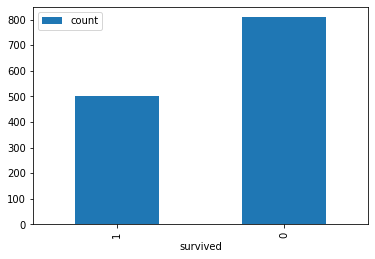

In [48]:
df.select('survived').groupBy('survived').count().toPandas().set_index('survived').plot.bar()

## EDA y Ejercicio 3

In [49]:
import seaborn as sns

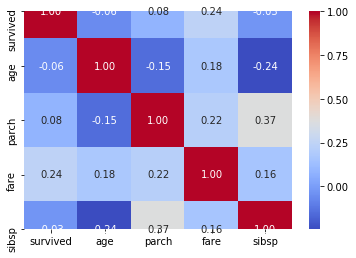

In [50]:
g = sns.heatmap(df.select('survived', 'age', 'parch', 'fare', 'sibsp').toPandas().corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

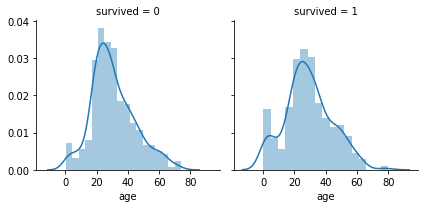

In [51]:
g = sns.FacetGrid(df.toPandas(), col='survived')
g = g.map(sns.distplot, 'age')

In [52]:
survived_age = df.filter((f.col('survived') == 1) & 
                         (f.col('age').isNotNull())).select('age').toPandas()
not_survived_age = df.filter((f.col('survived') == 0) & (f.col('age').isNotNull())).select('age').toPandas()

In [53]:
survived_age.squeeze()

0      29.00
1       0.92
2      48.00
3      63.00
4      53.00
       ...  
422    63.00
423    22.00
424    38.00
425    47.00
426    15.00
Name: age, Length: 427, dtype: float64

In [54]:
type(survived_age.squeeze())

pandas.core.series.Series

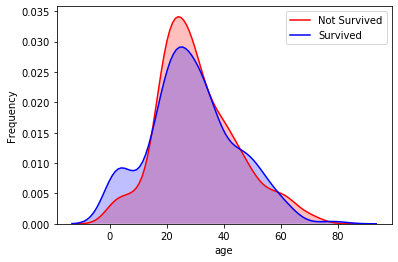

In [55]:
g = sns.kdeplot(not_survived_age.squeeze(), color='Red', shade=True)
g = sns.kdeplot(survived_age.squeeze(), color='Blue', shade=True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g.legend(['Not Survived', 'Survived'])

In [56]:
fare_mean = df.select(f.mean(f.col('fare'))).first()[0]
fare_mean

33.29547928134572

In [57]:
df.select('fare').fillna(fare_mean).filter(f.col('fare').isNull()).show()

+----+
|fare|
+----+
+----+



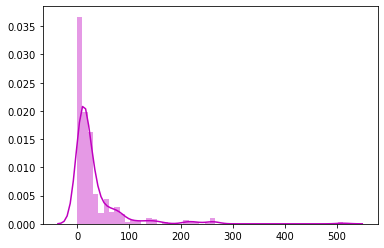

In [58]:
# Distribución de precio de boletos 
g = sns.distplot(df.select('fare').fillna(fare_mean).toPandas(), color='m')

In [59]:
df.select('fare').filter(f.col('fare') == 0).show()

+----+
|fare|
+----+
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
+----+



In [102]:
import numpy as np
@f.udf('double')
def np_log(x):
    return np.log(x) if x > 0 else 0

In [108]:
# FIXME: can't find python executable
#df = df.withColumn('log_fare', np_log(df.fare)).collect()
#df.select('log_fare').show()

In [125]:
df = df.withColumn('log_fare', f.log(f.col('fare'))).fillna(0).drop('fare')

In [121]:
df.select('log_fare').describe().show(

+-------+------------------+
|summary|          log_fare|
+-------+------------------+
|  count|              1309|
|   mean| 2.910407615035766|
| stddev|1.0038863030252416|
|    min|               0.0|
|    max| 6.238967387173662|
+-------+------------------+



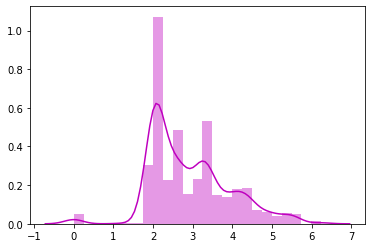

In [122]:
g = sns.distplot(df.select('log_fare').fillna(np.log(fare_mean)).toPandas(), color='m')

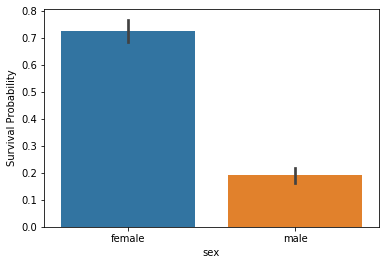

In [64]:
g = sns.barplot(x='sex', y='survived', data=df.toPandas())
g = g.set_ylabel("Survival Probability")

In [65]:
df.select('sex', 'survived').groupby('sex').mean().show()

+------+-------------------+
|   sex|      avg(survived)|
+------+-------------------+
|female| 0.7274678111587983|
|  male|0.19098457888493475|
+------+-------------------+



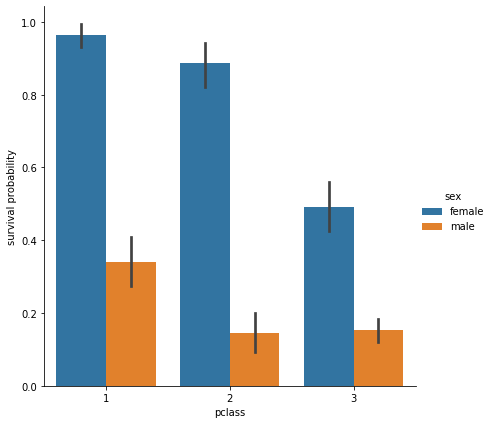

In [66]:
g = sns.catplot(x='pclass', y='survived', hue='sex', data=df.toPandas(),
                   height=6, kind='bar')
g = g.set_ylabels("survival probability")

## Ejercicio 4: Valores nulos y constantes

In [67]:
type(df)

pyspark.sql.dataframe.DataFrame

In [68]:
df.select([f.count(f.col(c).isNull()).alias(c) for c in df.columns if c == 'age']).show()

+----+
| age|
+----+
|1309|
+----+



In [70]:
df_nulls = df.select([f.sum(f.col(c).isNull().cast('integer') / df.count()).alias(c) for c in df.columns])

In [71]:
df_nulls.show()

+------+--------+----+---+-------------------+-----+-----+------+--------------------+------------------+--------------------+------------------+-----+
|pclass|survived|name|sex|                age|sibsp|parch|ticket|                fare|             cabin|            embarked|         home_dest|train|
+------+--------+----+---+-------------------+-----+-----+------+--------------------+------------------+--------------------+------------------+-----+
|   0.0|     0.0| 0.0|0.0|0.20091673032849391|  0.0|  0.0|   0.0|7.639419404125286E-4|0.7746371275782934|0.001527883880825...|0.4308632543926612|  0.0|
+------+--------+----+---+-------------------+-----+-----+------+--------------------+------------------+--------------------+------------------+-----+



In [74]:
null_cols = [c for c in df_nulls.columns if df_nulls.select(c).first()[0] >= 0.5]
null_cols

['cabin']

In [75]:
def _drop_nulls(df, max_null_prop=0.5):
    logger.info(
        f"Dropping columns with null ratio greater than {max_null_prop * 100}%..."
    )
    df_nulls = df.select([f.sum(f.col(c).isNull().cast('integer') / df.count()).alias(c) 
                          for c in df.columns])
    logger.info(f"Null proportions:\n {df_nulls.show()}")
    null_cols = [c for c in df_nulls.columns if df_nulls.select(c).first()[0] > max_null_prop 
                 and c not in PROTECTED_COLS]
    logger.info(f"Dropping the following {len(null_cols)} columns:\n {null_cols}")
    df = df.drop(*null_cols)
    return df

In [76]:
PROTECTED_COLS = ['survived', 'train']
df = _drop_nulls(df)

2019-12-10 16:26:14,760-__main__-INFO: Dropping columns with null ratio greater than 50.0%...
2019-12-10 16:26:18,477-__main__-INFO: Null proportions:
 None


+------+--------+----+---+-------------------+-----+-----+------+--------------------+------------------+--------------------+------------------+-----+
|pclass|survived|name|sex|                age|sibsp|parch|ticket|                fare|             cabin|            embarked|         home_dest|train|
+------+--------+----+---+-------------------+-----+-----+------+--------------------+------------------+--------------------+------------------+-----+
|   0.0|     0.0| 0.0|0.0|0.20091673032849391|  0.0|  0.0|   0.0|7.639419404125286E-4|0.7746371275782934|0.001527883880825...|0.4308632543926612|  0.0|
+------+--------+----+---+-------------------+-----+-----+------+--------------------+------------------+--------------------+------------------+-----+



2019-12-10 16:26:21,125-__main__-INFO: Dropping the following 1 columns:
 ['cabin']


In [77]:
df.toPandas().mean()

pclass            inf
survived     0.381971
age         29.881138
sibsp        0.498854
parch        0.385027
fare        33.295479
train        0.676853
dtype: float64

In [78]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
pclass       1309 non-null object
survived     1309 non-null int32
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int32
parch        1309 non-null int32
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1307 non-null object
home_dest    745 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int32(3), object(6)
memory usage: 98.6+ KB


In [79]:
df.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- embarked: string (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)



In [80]:
df.toPandas().std()

survived     0.486055
age         14.413493
sibsp        1.041658
parch        0.865560
fare        51.758668
train        0.467857
dtype: float64

In [81]:
df.dtypes

[('pclass', 'string'),
 ('survived', 'int'),
 ('name', 'string'),
 ('sex', 'string'),
 ('age', 'double'),
 ('sibsp', 'int'),
 ('parch', 'int'),
 ('ticket', 'string'),
 ('fare', 'double'),
 ('embarked', 'string'),
 ('home_dest', 'string'),
 ('train', 'boolean')]

In [82]:
num_cols = [c for c,dtype in df.dtypes if dtype.startswith(('int', 'double'))]
num_cols

['survived', 'age', 'sibsp', 'parch', 'fare']

In [83]:
df_std = df.select([f.stddev(f.col(c)).alias(c) for c in num_cols])
df_std.show()

+-------------------+-----------------+------------------+------------------+-----------------+
|           survived|              age|             sibsp|             parch|             fare|
+-------------------+-----------------+------------------+------------------+-----------------+
|0.48605517086648325|14.41349321127133|1.0416583905961012|0.8655602753495143|51.75866823917421|
+-------------------+-----------------+------------------+------------------+-----------------+



In [84]:
def _drop_std(df, min_std_dev=1.5e-2):
    num_cols = [c for c,dtype in df.dtypes if dtype.startswith(('int', 'double'))]
    df_std = df.select([f.stddev(f.col(c)).alias(c) for c in num_cols])
    low_variance_cols = [c for c in df_std.columns if df_std.select(c).first()[0] < min_std_dev 
                         and c not in PROTECTED_COLS]
    logger.info(
        f'Dropping the following {len(low_variance_cols)} columns '
        f'due to low variance:\n {low_variance_cols}'
    )
    df.drop(*low_variance_cols)
    return df

In [85]:
df = _drop_std(df)

2019-12-10 16:26:48,782-__main__-INFO: Dropping the following 0 columns due to low variance:
 []


In [86]:
def _get_typed_cols(df, col_type='cat'):
    assert col_type in ('cat', 'num')
    dtypes = ('int', 'double') if col_type == 'num' else ('string')
    typed_cols = [c for c,dtype in df.dtypes if dtype.startswith(dtypes) 
                  and c not in PROTECTED_COLS]
    return typed_cols

In [ ]:
# _get_typed_cols(df, col_type='foo')

In [87]:
num_cols = _get_typed_cols(df, col_type='num')
cat_cols = _get_typed_cols(df, col_type='cat')
num_cols, cat_cols

(['age', 'sibsp', 'parch', 'fare'],
 ['pclass', 'name', 'sex', 'ticket', 'embarked', 'home_dest'])

In [88]:
val_counts = df.filter(f.col('embarked').isNotNull()).select('embarked').groupBy('embarked').count().orderBy(f.desc('count'))
val_counts.show()

+--------+-----+
|embarked|count|
+--------+-----+
|       S|  914|
|       C|  270|
|       Q|  123|
+--------+-----+



In [89]:
val_counts.select('embarked').first()[0]

'S'

In [90]:
df.toPandas()['age'].median()

28.0

In [91]:
# df.approxQuantile?

In [92]:
df.approxQuantile('age', [0.5], 0)[0]

28.0

In [93]:
def _fill_nulls(df):
    for t in ['num', 'cat']:
        cols = _get_typed_cols(df, col_type=t)
        for c in cols:
            if t == 'num':
                median_val = df.approxQuantile(c, [0.5], 0)[0]
                df = df.fillna(median_val, subset=[c])
            else:
                val_counts = df.filter(f.col(c).isNotNull()).select(c).groupBy(c).count().orderBy(f.desc('count'))
                common_val = val_counts.select(c).first()[0]
                df = df.fillna(common_val, subset=[c])
    return df

In [94]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
pclass       1309 non-null object
survived     1309 non-null int32
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int32
parch        1309 non-null int32
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1307 non-null object
home_dest    745 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int32(3), object(6)
memory usage: 98.6+ KB


In [95]:
df.select('embarked').groupBy('embarked').count().orderBy(f.desc('count')).show()

+--------+-----+
|embarked|count|
+--------+-----+
|       S|  914|
|       C|  270|
|       Q|  123|
|    null|    2|
+--------+-----+



In [96]:
df = _fill_nulls(df)

In [97]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
pclass       1309 non-null object
survived     1309 non-null int32
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null int32
parch        1309 non-null int32
ticket       1309 non-null object
fare         1309 non-null float64
embarked     1309 non-null object
home_dest    1309 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int32(3), object(6)
memory usage: 98.6+ KB


In [98]:
df.select('embarked').groupBy('embarked').count().orderBy(f.desc('count')).show()

+--------+-----+
|embarked|count|
+--------+-----+
|       S|  916|
|       C|  270|
|       Q|  123|
+--------+-----+



## Ejercicio 5: Ingenieria de Atributos

In [ ]:
df.name

In [ ]:
df.name.str.split(',').str[-1].str.split('.').str[0].str.strip().value_counts()

In [ ]:
# Creamos un nuevo atributo "titulo"
df['title'] = df.name.str.split(',').str[-1].str.split('.').str[0].str.strip()
df['title'] = df['title'].replace(
    df.title.value_counts(dropna=False).index.tolist()[4:], 'other'
)
df['title'] = df['title'].replace(['Miss'], 'Mrs')
df = df.drop(['name'], axis=1)

In [ ]:
df

In [ ]:
df.title.value_counts()

In [ ]:
g = sns.countplot(df['title'])

In [ ]:
g = sns.factorplot(x='title',y='survived',data=df,kind="bar")

In [ ]:
df.info()

In [ ]:
df['family_size'] = df['parch'] + df['sibsp'] + 1
df['family_single'] = df['family_size'] == 1
df['family_small'] = (df['family_size'] > 1) & (df['family_size'] <= 4)
df['family_large'] = df['family_size'] > 4

In [ ]:
df.sample(20)

In [ ]:
for fsize in ['single', 'small', 'large']:
    g = sns.factorplot(x=f'family_{fsize}',y='survived',data=df,kind="bar")
    g = g.set_ylabels("Survival Probability")

In [ ]:
df.ticket.sample(30)

In [ ]:
# Ticket prefix
def extract_ticket_prefix(i):
    if not i.isdigit() :
        rv = i.replace('.',"").replace('/',"").strip().split(' ')[0]
    else:
        rv = 'X'
    return rv

In [ ]:
df['ticket'] = df['ticket'].apply(extract_ticket_prefix)

In [ ]:
df.ticket.value_counts()

In [ ]:
df.info()

## Ejercicio 6: Fitteo de regresión logistica

In [ ]:
df['home.dest'].value_counts().index.values[0: 10]

In [ ]:
def _encode_categorical(df, top=20):
    logger.info("Filtering categorical columns top values...")
    cat_cols = _get_typed_cols(df, col_type='cat')
    logger.info(f"Categorical columns:\n {cat_cols}")

    for c in cat_cols:
        top_categories = df[c].value_counts().index.values[0:top]
        logger.info(f"Top categories for {c}:\n {top_categories}")
        df[c] = df[c].where(df[c].isin(top_categories), other='OTHER')

    logger.info("Getting dummies from top categories...")
    df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    logger.info(
        f"{len(df.columns)} columns after dummies:\n " f"{sorted(df.columns.tolist())}"
    )
    return df

In [ ]:
df = _encode_categorical(df)

In [ ]:
df.columns

In [ ]:
df_train = df[df['train']]
df_test = df[~df['train']]
y_train = df_train['survived']
y_test = df_test['survived']
X_train = df_train.drop(['survived', 'train'], axis=1)
X_test = df_test.drop(['survived', 'train'], axis=1)

In [ ]:
'age' in X_test.columns

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [ ]:
y_pred

In [ ]:
y_pred_proba

In [ ]:
lr.score?

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
roc_score = metrics.roc_auc_score(y_test, y_pred_proba)
roc_score

In [ ]:
f1_score = metrics.f1_score(y_test, y_pred)
f1_score

In [ ]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

## Ejercicio 7: árboles

In [ ]:
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

In [ ]:
tree.plot_tree(dt)

In [ ]:
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, verbose=2,)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_import = list(
zip(np.asanyarray(X_train.columns)[indices], importances[indices])
)
feat_import = pd.DataFrame(feat_import, columns=['feature', 'importance'])

In [ ]:
feat_import

In [ ]:
ax = feat_import[:20].plot(kind='bar')
ax.set_xticklabels(feat_import[:20]['feature'].tolist())